# Visualizations

### Drawing
Embeddings are colored by corresponding cluster and can then be plotted by coloring the original graph and/or by dimensionaly-reducing the embeddings with T-SNE [1]. The display mode can be set by using the parameter `draw` of the `run` method and the corresponding settings "graph" and "tsne".

### Saving/Exporting
By setting `save` to `true` the graph is exported as a Gephi [2] file. This can be used to get more configuration options for the visualization.

[1] http://www.jmlr.org/papers/v9/vandermaaten08a.html <br>
[2] https://gephi.org/

In [1]:
# Imports
from impl.run import run
from impl.main import Options
from impl.model.node2vec import Node2Vec, MethodOpts
from impl.utils import set_debug

# Set verbose logging
set_debug(False, False)

# Create necessary directories
!mkdir -p out/default/model && mkdir out/default/gefx

# Define main visualization function
def visualize(p, q, num_clusters, title=None):
    run(
        Options(
            input='data/datasets/lesmiserables/lesmis.edgelist',
            graph_format='edgelist',
            weighted=True,
            output=f'out/default/model/lesmis-p{p}-q{q}.model',
            label_file=None
        ),
        Node2Vec(
            MethodOpts(
                dim=16,
                walk_length=80,
                num_walks=10,
                window=10
            ),
            p=p,
            q=q
        ),
        title=title,
        num_clusters=num_clusters,
        draw=["graph", "tsne"],
        save=True,
        save_path='out/default/gefx/'
    )

## node2vec Reproduction

100%|██████████| 770/770 [00:00<00:00, 63185.77it/s]


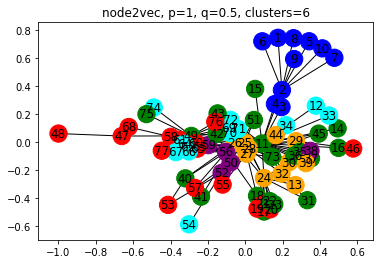

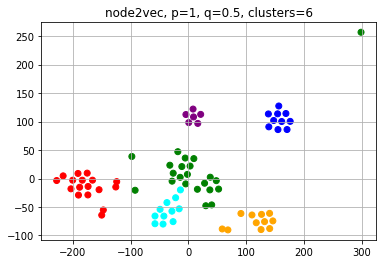

100%|██████████| 770/770 [00:00<00:00, 60454.76it/s]


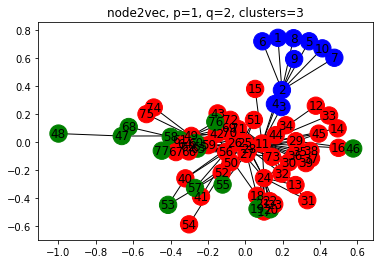

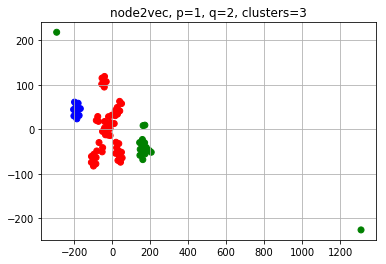

In [2]:
visualize(1, 0.5, 6, title="node2vec, p=1, q=0.5, clusters=6")
visualize(1, 2, 3, title="node2vec, p=1, q=2, clusters=3")